In [5]:
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
os.getcwd()
pd.__version__

'1.5.3'

In [2]:
image_data = pd.read_csv('toy_data_imaging.csv')
gene_data = pd.read_csv('toy_data_gene.csv')


In [7]:
from GeneSGAN.Gene_SGAN_clustering import cross_validated_clustering

if __name__ == '__main__':
	output_dir = './gene-sgan'
	if not os.path.exists(output_dir):
		os.makedirs(output_dir)

	image_data = pd.read_csv('toy_data_imaging.csv')
	gene_data = pd.read_csv('toy_data_gene.csv')

	fold_number = 1
	ncluster = 3
	start_saving_epoch = 20000
	max_epoch = 30000
	WD = 0.11
	AQ = 30
	cluster_loss = 0.01
	genelr = 0.0002


	cross_validated_clustering(image_data, gene_data, ncluster, fold_number, 0.8, start_saving_epoch, max_epoch, output_dir, WD, AQ, cluster_loss,\
		genelr = 0.0002, batchSize=120, lipschitz_k=0.5)




Start Gene-SGAN for semi-supervised clustering
****** Starting training of Fold 0 ******


/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/GeneSGAN/utils.py:154: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gene_data_fillna = gene_data.fillna(gene_data.mean())
  0%|                                                                                                                 | 0/30000 [00:00<?, ?it/s]/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [4:39:43<00:00,  1.79it/s]


****** Model not converging or not converged at max interation, Start retraining ******


/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/GeneSGAN/utils.py:154: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gene_data_fillna = gene_data.fillna(gene_data.mean())
  0%|                                                                                                                 | 0/30000 [00:00<?, ?it/s]/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
 67%|██████████████████████████████████████████████████████████████████                                 | 20005/30000 [1:20:34<40:15,  4.14it/s]
/home/miranda/.local/share/mamba/envs/gen

****** Start Checking outlier models ******


/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,


****** There are no outlier models ******
Results have Adjuested_random_index (ARI) = nan+- nan


/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/miranda/.local/share/mamba/envs/genesgan2/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/miranda/.l

****** Gene-SGAN clustering finished ******


In [33]:
clustering_result = pd.read_csv("clustering_result.csv")
cluster_minimal = (clustering_result.iloc[:,3:6])
y = clustering_result.iloc[:,2]
print(y)

0       2
1       2
2       2
3       2
4       2
       ..
1195    1
1196    1
1197    1
1198    1
1199    1
Name: cluster_label, Length: 1200, dtype: int64


[[ 0.71935292 -0.34944043]
 [ 0.70461477 -0.33249458]
 [ 0.71671636 -0.34832317]
 ...
 [-0.04725721  0.79467061]
 [-0.04219627  0.82996156]
 [-0.0452599   0.83632486]]


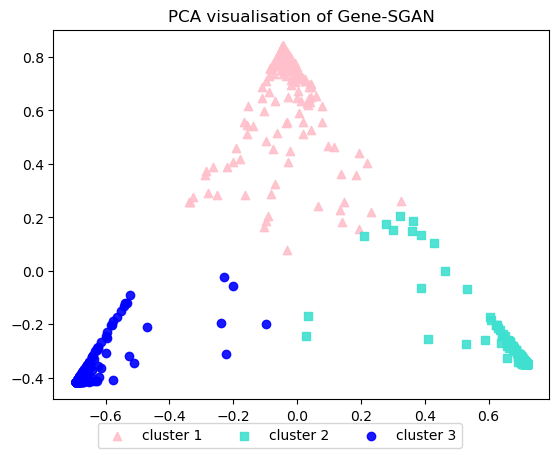

In [45]:
fig, ax = plt.subplots()
# PCA
pca = PCA(n_components=2,random_state=42)

clustering_result_pca = pca.fit_transform(cluster_minimal)
print(clustering_result_pca)
for l, c, m in zip(range(1, 4), ["pink", "turquoise", "blue"], ('^', 's', 'o')):
    ax.scatter(clustering_result_pca[y == l, 0],
                clustering_result_pca[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )
import numpy as np
plt.title("PCA visualisation of Gene-SGAN")
labels = [1,2,3]
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels))